In [1]:
#from causis_api.const import get_version
#from causis_api.const import login
import pandas as pd
import numpy as np
import datetime

#login.username = input("Enter Username:tianjing.cao")
#login.password = input("Enter Password:CAM991020@ctj")

#login.username = 'tianjing.cao' 
#login.password = 'CAM991020@ctj'
#login.version = get_version()

In [2]:
#from causis_api.data import *
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn import linear_model
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
start_time="2010-11-01"
end_time="2021-12-31"
#raw_data_path="C:/Users/ctj/Desktop/线性模型量化选股研报复现_曹恬婧/数据/"
#raw_data_path="C:/Users/admin/Desktop/纽约大学21硕曹恬婧-代码&数据/代码&数据/数据/"

## 导入并处理历史数据，估值数据等

st_data=pd.read_pickle("stock_st_standard_").loc[:,:end_time]
price_data=pd.read_pickle("stock_price_standard_").loc[:,:end_time]
valuation_data=pd.read_pickle("stock_valuation_standard_").loc[:,:end_time]
#valuation_data
#price_data
#st_data

st_data.to_csv("stock_st_standard_.csv")
price_data.to_csv("stock_price_standard_.csv")
valuation_data.to_csv("stock_valuation_standard_.csv")

In [14]:
st_data=pd.read_csv("stock_st_standard_.csv")
price_data=pd.read_csv("stock_price_standard_.csv")
valuation_data=pd.read_csv("stock_valuation_standard_.csv")

In [5]:
valuation_data

,Unnamed: 0,Unnamed: 1,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,...,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
0,S.CN.SSE.600004,Capitalization,115000.0000,115000.0000,115000.0000,115000.000,115000.0000,115000.0000,115000.0000,115000.0000,...,236671.8300,236671.8300,236671.8300,236671.8300,236671.8300,236671.8300,236671.8300,236671.8300,236671.8300,236671.8300
1,S.CN.SSE.600004,CirculatingCap,101500.0000,101500.0000,101500.0000,101500.000,101500.0000,101500.0000,101500.0000,101500.0000,...,206932.0500,206932.0500,206932.0500,206932.0500,206932.0500,206932.0500,206932.0500,206932.0500,206932.0500,206932.0500
2,S.CN.SSE.600004,CirculatingMarketCap,103.0225,103.4285,101.9060,99.267,103.3270,105.4585,106.1690,104.6465,...,228.4530,233.2124,235.0748,230.3154,229.6946,242.3174,240.0412,248.3185,248.9393,249.5601
3,S.CN.SSE.600004,MarketCap,116.7250,117.1850,115.4600,112.470,117.0700,119.4850,120.2900,118.5650,...,261.2857,266.7292,268.8592,263.4157,262.7057,277.1427,274.5393,284.0062,284.7162,285.4262
4,S.CN.SSE.600004,PBRatio,1.9366,1.9442,1.9156,1.866,1.9423,1.9824,1.9958,1.9671,...,1.4325,1.4623,1.4740,1.4441,1.4402,1.5194,1.5051,1.5570,1.5609,1.5648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14095,S.CN.SZSE.300869,PCFRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-51.2722,-51.7401,-51.1293,-50.1025,-50.3494,-51.5841,-51.1942,-53.4167,-53.7416,-52.7019
14096,S.CN.SZSE.300869,PSRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.7036,15.8469,15.6598,15.3454,15.4210,15.7992,15.6798,16.3604,16.4600,16.1415
14097,S.CN.SZSE.300869,PeRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0087,41.3829,40.8943,40.0731,40.2706,41.2581,40.9463,42.7239,42.9837,42.1521
14098,S.CN.SZSE.300869,PeRatioLYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.8412,26.0770,25.7692,25.2517,25.3761,25.9984,25.8019,26.9220,27.0858,26.5618


In [6]:
st_data=st_data.rename(columns= { 'Unnamed: 0' : 'Symbol','Unnamed: 1':'IsST'})
price_data=price_data.rename(columns= { 'Unnamed: 0' : 'Symbol','Unnamed: 1':'type'})
valuation_data=valuation_data.rename(columns= { 'Unnamed: 0' : 'Symbol','Unnamed: 1':'type'})

In [16]:
price_data

,Unnamed: 0,Unnamed: 1,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,...,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
0,S.CN.SSE.600004,Close,10.150,10.190,10.040,9.780,10.180,10.390,10.460,10.310,...,1.104000e+01,1.127000e+01,1.136000e+01,1.113000e+01,1.110000e+01,1.171000e+01,1.160000e+01,1.200000e+01,1.203000e+01,1.206000e+01
1,S.CN.SSE.600004,Factor,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,S.CN.SSE.600004,FactorPost,1.311,1.311,1.311,1.311,1.311,1.311,1.311,1.311,...,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00
3,S.CN.SSE.600004,High,10.280,10.240,10.190,10.050,10.250,10.460,10.470,10.500,...,1.111000e+01,1.128000e+01,1.155000e+01,1.139000e+01,1.118000e+01,1.175000e+01,1.192000e+01,1.206000e+01,1.221000e+01,1.216000e+01
4,S.CN.SSE.600004,Limit_Down,9.140,9.140,9.170,9.040,8.800,9.160,9.350,9.410,...,9.930000e+00,9.940000e+00,1.014000e+01,1.022000e+01,1.002000e+01,9.990000e+00,1.054000e+01,1.044000e+01,1.080000e+01,1.083000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15505,S.CN.SZSE.300869,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.906000e+01,3.867000e+01,3.932000e+01,3.828000e+01,3.795000e+01,3.885000e+01,3.842000e+01,3.955000e+01,4.017000e+01,4.000000e+01
15506,S.CN.SZSE.300869,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.910000e+01,3.936000e+01,3.991000e+01,3.960000e+01,3.886000e+01,3.885000e+01,3.950000e+01,3.980000e+01,4.080000e+01,4.134000e+01
15507,S.CN.SZSE.300869,Pause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
15508,S.CN.SZSE.300869,Total_Turnover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.621330e+08,2.024834e+08,2.102229e+08,2.357128e+08,2.074321e+08,2.310258e+08,2.382185e+08,6.058344e+08,3.795568e+08,3.039572e+08


In [15]:
#获取股票ticker list
ticker_list=list(map(lambda x:x,price_data.Symbol.drop_duplicates().tolist()))

AttributeError: 'DataFrame' object has no attribute 'Symbol'

In [7]:
#去除停牌股票
pause_list=[]
for i in ticker_list:
    if (st_data[st_data.Symbol==i][st_data["IsST"]=="IsST"].isin(["True"]).any().any()):
        pause_list.append(i)
        ticker_list.remove(i)
    if (i not in pause_list) and (price_data[price_data.Symbol==i][price_data.Symbol=="Close"].iloc[:,2:].isna().any().any()):
        pause_list.append(i)
        ticker_list.remove(i)

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/3252425449.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if (st_data[st_data.Symbol==i][st_data["IsST"]=="IsST"].isin(["True"]).any().any()):
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/3252425449.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if (i not in pause_list) and (price_data[price_data.Symbol==i][price_data.Symbol=="Close"].iloc[:,2:].isna().any().any()):


In [8]:
price_data=price_data[price_data.Symbol.isin(ticker_list)]

In [9]:
price_data

,Symbol,type,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,...,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
0,S.CN.SSE.600004,Close,10.150,10.190,10.040,9.780,10.180,10.390,10.460,10.310,...,1.104000e+01,1.127000e+01,1.136000e+01,1.113000e+01,1.110000e+01,1.171000e+01,1.160000e+01,1.200000e+01,1.203000e+01,1.206000e+01
1,S.CN.SSE.600004,Factor,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,S.CN.SSE.600004,FactorPost,1.311,1.311,1.311,1.311,1.311,1.311,1.311,1.311,...,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00,2.624296e+00
3,S.CN.SSE.600004,High,10.280,10.240,10.190,10.050,10.250,10.460,10.470,10.500,...,1.111000e+01,1.128000e+01,1.155000e+01,1.139000e+01,1.118000e+01,1.175000e+01,1.192000e+01,1.206000e+01,1.221000e+01,1.216000e+01
4,S.CN.SSE.600004,Limit_Down,9.140,9.140,9.170,9.040,8.800,9.160,9.350,9.410,...,9.930000e+00,9.940000e+00,1.014000e+01,1.022000e+01,1.002000e+01,9.990000e+00,1.054000e+01,1.044000e+01,1.080000e+01,1.083000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15505,S.CN.SZSE.300869,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.906000e+01,3.867000e+01,3.932000e+01,3.828000e+01,3.795000e+01,3.885000e+01,3.842000e+01,3.955000e+01,4.017000e+01,4.000000e+01
15506,S.CN.SZSE.300869,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.910000e+01,3.936000e+01,3.991000e+01,3.960000e+01,3.886000e+01,3.885000e+01,3.950000e+01,3.980000e+01,4.080000e+01,4.134000e+01
15507,S.CN.SZSE.300869,Pause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
15508,S.CN.SZSE.300869,Total_Turnover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.621330e+08,2.024834e+08,2.102229e+08,2.357128e+08,2.074321e+08,2.310258e+08,2.382185e+08,6.058344e+08,3.795568e+08,3.039572e+08


#获取A股指数
instruments=all_instruments("S")
A_index=instruments[(instruments["Type"]=="INDEX") & (instruments["Name"]=="A股指数")]
A_index_data=get_price(A_index["Symbol"],start_time,end_time)
A_index_data.to_excel("A_index_data.xlsx")

In [10]:
A_index_data=pd.read_csv("A_index_data.csv").iloc[:,1:]

In [11]:
A_index_data

,Open,Close,High,Low,Limit_Up,Limit_Down,Total_Turnover,Volume,Symbol,Clock,Factor,FactorPost,Pause
0,3450.73,3402.31,3456.53,3401.84,3781.21,3093.71,1.334140e+11,10889116100,S.CN.SSE.000002,2010-01-04,0,0,False
1,3413.55,3442.58,3451.40,3378.82,3742.54,3062.08,1.613070e+11,12541400300,S.CN.SSE.000002,2010-01-05,0,0,False
2,3437.66,3413.16,3456.94,3411.94,3786.84,3098.32,1.576020e+11,12302836100,S.CN.SSE.000002,2010-01-06,0,0,False
3,3412.94,3348.66,3428.52,3331.72,3754.48,3071.84,1.567870e+11,12803163300,S.CN.SSE.000002,2010-01-07,0,0,False
4,3332.34,3351.87,3354.99,3302.63,3683.53,3013.79,1.213380e+11,9781151500,S.CN.SSE.000002,2010-01-08,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,3786.57,3789.50,3806.67,3774.73,4171.00,3412.64,4.071380e+11,32890829900,S.CN.SSE.000002,2021-12-27,1,0,False
2913,3793.37,3804.29,3805.32,3780.43,4168.45,3410.55,4.083930e+11,31589097800,S.CN.SSE.000002,2021-12-28,1,0,False
2914,3805.11,3769.55,3805.11,3768.85,4184.72,3423.86,4.100850e+11,30486717000,S.CN.SSE.000002,2021-12-29,1,0,False
2915,3768.99,3792.79,3803.10,3767.95,4146.50,3392.59,4.136580e+11,30764131900,S.CN.SSE.000002,2021-12-30,1,0,False


## 计算指标

In [12]:
#计算技术指标
def macd(x,fastperiod=10,slowperiod=30,signalperiod=9):
    macd,dea,dif=ta.MACD(x,fastperiod=fastperiod,slowperiod=slowperiod,signalperiod=signalperiod)
    return macd

def dea(x,fastperiod=10,slowperiod=30,signalperiod=9):
    macd,dea,dif=ta.MACD(x,fastperiod=fastperiod,slowperiod=slowperiod,signalperiod=signalperiod)
    return dea

def dif(x,fastperiod=10,slowperiod=30,signalperiod=9):
    macd,dea,dif=ta.MACD(x,fastperiod=fastperiod,slowperiod=slowperiod,signalperiod=signalperiod)
    return dif

def rsi(x,rsiperiod=20):
    res=ta.RSI(x,timeperiod=rsiperiod)
    return res

def psy(x,period=20):
    difference=x[1:].values-x[:-1].values
    difference_dir=np.where(difference>0,1,0)
    p=np.zeros((len(x),))
    p[:period]*=np.nan
    for i in range(period,len(x)):
        p[i]=(difference_dir[i-period+1:i+1].sum())/period
    return pd.Series(p*100,index=x.index)

def bias(x,biasperiod=20):
    res=(x-x.rolling(biasperiod,min_periods=1).mean())/x.rolling(biasperiod,min_periods=1).mean()*100
    res=round(res,2)
    return res


In [13]:
def return_n_month(df,n):
    n*=30
    return df.pct_change(n)
def wgt_return_Nm(df,n):
    n*30
    df["product"]=df["TurnoverRatio"]*df["pct_change"]
    return df["product"].rolling(n).mean()

In [14]:
columns=["Close","A_index","date","MACD","DEA","DIF","RSI","PSY","BIAS"]
for i in [1,3,6,9]:
    columns.append("return_%i"%i)
    columns.append("wgt_return_%i"%i)
    columns.append("turn_%i"%i)
    columns.append("bias_turn_%i"%i)
columns

['Close',
 'A_index',
 'date',
 'MACD',
 'DEA',
 'DIF',
 'RSI',
 'PSY',
 'BIAS',
 'return_1',
 'wgt_return_1',
 'turn_1',
 'bias_turn_1',
 'return_3',
 'wgt_return_3',
 'turn_3',
 'bias_turn_3',
 'return_6',
 'wgt_return_6',
 'turn_6',
 'bias_turn_6',
 'return_9',
 'wgt_return_9',
 'turn_9',
 'bias_turn_9']

In [15]:
val_columns=["MarketCap","CirculatingMarketCap","TurnoverRatio","PBRatio","PCFRatio","PSRatio","PeRatioLYR"]

In [16]:
A_index_data

,Open,Close,High,Low,Limit_Up,Limit_Down,Total_Turnover,Volume,Symbol,Clock,Factor,FactorPost,Pause
0,3450.73,3402.31,3456.53,3401.84,3781.21,3093.71,1.334140e+11,10889116100,S.CN.SSE.000002,2010-01-04,0,0,False
1,3413.55,3442.58,3451.40,3378.82,3742.54,3062.08,1.613070e+11,12541400300,S.CN.SSE.000002,2010-01-05,0,0,False
2,3437.66,3413.16,3456.94,3411.94,3786.84,3098.32,1.576020e+11,12302836100,S.CN.SSE.000002,2010-01-06,0,0,False
3,3412.94,3348.66,3428.52,3331.72,3754.48,3071.84,1.567870e+11,12803163300,S.CN.SSE.000002,2010-01-07,0,0,False
4,3332.34,3351.87,3354.99,3302.63,3683.53,3013.79,1.213380e+11,9781151500,S.CN.SSE.000002,2010-01-08,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,3786.57,3789.50,3806.67,3774.73,4171.00,3412.64,4.071380e+11,32890829900,S.CN.SSE.000002,2021-12-27,1,0,False
2913,3793.37,3804.29,3805.32,3780.43,4168.45,3410.55,4.083930e+11,31589097800,S.CN.SSE.000002,2021-12-28,1,0,False
2914,3805.11,3769.55,3805.11,3768.85,4184.72,3423.86,4.100850e+11,30486717000,S.CN.SSE.000002,2021-12-29,1,0,False
2915,3768.99,3792.79,3803.10,3767.95,4146.50,3392.59,4.136580e+11,30764131900,S.CN.SSE.000002,2021-12-30,1,0,False


price_data[price_data.Symbol==ticker].columns.tolist()[2:]

In [17]:
def get_stock_factors(ticker,index_data,price_data,valuation_data,columns,val_columns):

    data=pd.DataFrame()
    #temp计算数据
    temp=price_data[price_data.Symbol==ticker]#["S.CN.SSE.600004"]
    if not temp.any().sum():
        return data
    data["Close"]=temp[temp.type=="Close"].iloc[0,:][2:].tolist()
    data["date"]=temp.columns.tolist()[2:]
    data["A_index"]=index_data["Close"].tolist()
    data["pct_change"]=temp[temp.type=="Close"].iloc[0,:][2:].pct_change().tolist()
    data.insert(0,"Symbol",ticker)
    for j in val_columns:
        data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
    #temp["turnover_rate"]=temp["Total_Turnover"]/temp["CirculatingMarketCap"]

    for i in [1,3,6,9]:
        #动量反转因子
        data["return_%i"%i]=return_n_month(data[["Close"]],i)
        data["wgt_return_%i"%i]=wgt_return_Nm(data,i)
        #print(temp[["pct_change","TurnoverRatio"]])
        data["turn_%i"%i]=data["TurnoverRatio"].rolling(30*i).mean()
        #换手率因子
        data["bias_turn_%i"%i]=data["turn_%i"%i]/data["TurnoverRatio"].rolling(360).mean()


    #

    #print(ticker)
    data["MACD"]=macd(data["Close"])
    data["DEA"]=dea(data["Close"])
    data["DIF"]=dif(data["Close"])
    data["RSI"]=rsi(data["Close"])
    data["PSY"]=psy(data["Close"])
    data["BIAS"]=bias(data["Close"])

    #建df
    df=pd.DataFrame()
    #ticker="S.CN.SSE.600004"[-6:]

    #获取月度数据
    data["date"]=data["date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d"))
    monthly_data=data[columns+val_columns].resample("M",on="date").last()#,
    monthly_data["pct_change"]=monthly_data["Close"].pct_change().tolist()
    monthly_data["a_index_pct"]=monthly_data["A_index"].pct_change().tolist()
    monthly_data["ln_price"]=monthly_data["Close"].apply(np.log).tolist()
        #市值
    monthly_data["ln_capital"]=monthly_data["MarketCap"].apply(np.log).tolist()
    date=monthly_data["date"].tolist()


    #构建df

    df=monthly_data[columns+val_columns]
    df.insert(0,"target",(monthly_data["pct_change"]-monthly_data["a_index_pct"]).shift(-1).tolist())
    df.insert(0,"year_month",[datetime.datetime.strftime(d,"%Y%m") for d in date])
    df.insert(0,"ticker",ticker[-6:])
    df=df.reset_index(drop=True)
    #df=df.iloc[2:,:]
    return df

In [18]:
#计算所有股票月度因子数据total_factors
total_factors=pd.DataFrame()

for i in ticker_list:
    total_factors=pd.concat([total_factors,get_stock_factors(i,A_index_data,price_data,valuation_data,columns,val_columns)])

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/1921099672.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[j]=valuation_data[valuation_data.Symbol==ticker][valuation_data.type==j].iloc[0,:][2:].tolist()
C:\Users\ctj\AppData\Loc

#total_factors.to_excel("total_factors.xlsx")

In [6]:
#获取total_factors
total_factors=pd.read_excel("total_factors.xlsx")

total_factors=pd.read_csv("total_factors.xlsx")

In [7]:
total_factors

,Unnamed: 0,ticker,year_month,target,Close,A_index,date,MACD,DEA,DIF,...,wgt_return_9,turn_9,bias_turn_9,MarketCap,CirculatingMarketCap,TurnoverRatio,PBRatio,PCFRatio,PSRatio,PeRatioLYR
0,0,600004,201001,0.079076,10.710000,3134.75,2010-01-29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,600004,201002,-0.052690,11.780000,3200.05,2010-02-26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,600004,201003,-0.020659,11.380000,3260.00,2010-03-31,0.058265,0.147457,-0.089192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,600004,201004,-0.009453,10.270000,3009.37,2010-04-30,-0.398970,-0.193168,-0.205802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,600004,201005,0.037013,9.180000,2718.42,2010-05-31,-0.491612,-0.583044,0.091431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200299,139,300869,202108,-0.083031,38.040001,3714.32,2021-08-31,-9.898880,-6.751653,-3.147227,...,-0.261641,NaN,NaN,152.843506,81.256302,3.4729,9.1486,528.789429,13.119200,24.917601
200300,140,300869,202109,-0.086956,35.139999,3739.56,2021-09-30,-5.659923,-6.429451,0.769528,...,-0.014842,12.322630,NaN,141.191406,75.061699,1.3638,8.4512,488.476898,12.119100,23.018000
200301,141,300869,202110,0.484341,31.879999,3717.81,2021-10-29,-3.623043,-3.863533,0.240490,...,-0.024153,10.353336,NaN,128.092804,68.098099,1.9520,7.2931,-41.433701,12.690300,20.882601
200302,142,300869,202111,-0.166951,47.470001,3735.21,2021-11-30,3.192599,0.974645,2.217954,...,0.563724,7.885801,NaN,190.732895,72.790298,19.3687,10.8595,-61.695599,18.896099,31.094601


## 合并行业分类数据

In [20]:
ticker_list_df=pd.DataFrame(ticker_list,columns=["Symbol"])

#获取所有行业及代码
industry=get_all_industry()
industry=pd.DataFrame(industry)
industry.to_excel("industry.xlsx")

industry=pd.read_excel("industry.xlsx")

for i in industry["Symbol"]:
    temp=industry_components(i,start_time,end_time)
    industy_ticker=pd.DataFrame(temp["Stocks"].iloc[-1],columns=["Symbol"])
    industy_ticker["industry"]=temp["Industries"].iloc[-1]
    industy_ticker["industry_name"]=industry[industry["Symbol"]==i]["Name"].to_list()[0]
    industry_ticker_total=pd.concat([industry_ticker_total,industy_ticker])
industry_ticker_total.to_excel("industry_ticker_total.xlsx")   

In [8]:
#获取所有行业股票
industry_ticker_total=pd.read_excel("industry_ticker_total.xlsx")#.iloc[:,1:]

In [9]:
industry_ticker_total

,Unnamed: 0,Symbol,industry,industry_name
0,0,S.CN.SZSE.000629,S.CN.INBS.801040,钢铁I
1,1,S.CN.SZSE.000655,S.CN.INBS.801040,钢铁I
2,2,S.CN.SZSE.000708,S.CN.INBS.801040,钢铁I
3,3,S.CN.SZSE.000709,S.CN.INBS.801040,钢铁I
4,4,S.CN.SZSE.000717,S.CN.INBS.801040,钢铁I
...,...,...,...,...
4534,376,S.CN.SSE.605100,S.CN.INBS.801890,机械设备I
4535,377,S.CN.SSE.605186,S.CN.INBS.801890,机械设备I
4536,378,S.CN.SSE.605259,S.CN.INBS.801890,机械设备I
4537,379,S.CN.SSE.605286,S.CN.INBS.801890,机械设备I


In [20]:
#处理以方便合并
industry_ticker_total["ticker"]=industry_ticker_total["Symbol"].apply(lambda x:x[-6:]).tolist()
industry_ticker_total["ticker"]=pd.to_numeric(industry_ticker_total["ticker"], errors='coerce').fillna('0').astype('int64')
#industry_ticker_total

In [32]:
industry_ticker_total

,Unnamed: 0,Symbol,industry,industry_name,ticker
0,0,S.CN.SZSE.000629,S.CN.INBS.801040,钢铁I,629
1,1,S.CN.SZSE.000655,S.CN.INBS.801040,钢铁I,655
2,2,S.CN.SZSE.000708,S.CN.INBS.801040,钢铁I,708
3,3,S.CN.SZSE.000709,S.CN.INBS.801040,钢铁I,709
4,4,S.CN.SZSE.000717,S.CN.INBS.801040,钢铁I,717
...,...,...,...,...,...
4534,376,S.CN.SSE.605100,S.CN.INBS.801890,机械设备I,605100
4535,377,S.CN.SSE.605186,S.CN.INBS.801890,机械设备I,605186
4536,378,S.CN.SSE.605259,S.CN.INBS.801890,机械设备I,605259
4537,379,S.CN.SSE.605286,S.CN.INBS.801890,机械设备I,605286


In [27]:
ticker_list=total_factors.ticker.drop_duplicates().tolist()
ticker_list

AttributeError: 'int' object has no attribute 'typr'

In [33]:
ticker_list_df=pd.DataFrame(ticker_list,columns=["Symbol"])
ticker_list_df

,Symbol
0,600004
1,600006
2,600008
3,600012
4,600017
...,...
1386,300724
1387,300741
1388,300751
1389,300763


In [31]:
#查找所需ticker的行业
ticker_total=ticker_list_df.merge(industry_ticker_total,on="ticker",how="inner")
ticker_total=ticker_total.drop_duplicates(subset=["Symbol"])

KeyError: 'ticker'

In [25]:
df_total=total_factors.copy()
#合并factors和行业数据
df_total["ticker"]=pd.to_numeric(df_total["ticker"], errors='coerce').fillna('0').astype('int64')
total=pd.merge(df_total,industry_ticker_total,on="ticker",how="inner")
total=total.drop_duplicates(subset=["ticker","year_month"])#.iloc[:,1:]
#total

In [26]:
df=total.copy()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169920 entries, 0 to 173807
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ticker                169920 non-null  int64         
 1   year_month            169920 non-null  object        
 2   target                149467 non-null  float64       
 3   Close                 150557 non-null  float64       
 4   A_index               169920 non-null  float64       
 5   date                  169920 non-null  datetime64[ns]
 6   MACD                  148253 non-null  float64       
 7   DEA                   148253 non-null  float64       
 8   DIF                   148253 non-null  float64       
 9   RSI                   149371 non-null  float64       
 10  PSY                   168740 non-null  float64       
 11  BIAS                  150557 non-null  float64       
 12  return_1              149259 non-null  float64       
 13 

In [28]:
#补充计算ln_capital,ln_price，收益率，指数收益率
df.insert(4,"ln_capital",df["MarketCap"].apply(np.log).tolist())
df.insert(4,"ln_price",df["Close"].apply(np.log).tolist())
df.insert(4,"price_pct_change",df.groupby(["ticker"])["Close"].pct_change().shift(-1))
df.insert(4,"A_index_pct_change",df.groupby(["ticker"])["A_index"].pct_change().shift(-1))

In [29]:
df

,ticker,year_month,target,Close,A_index_pct_change,price_pct_change,ln_price,ln_capital,A_index,date,...,CirculatingMarketCap,TurnoverRatio,PBRatio,PCFRatio,PSRatio,PeRatioLYR,Unnamed: 0,Symbol,industry,industry_name
0,600004,201001,0.079076,10.71,0.020831,0.099907,2.371178,4.813525,3134.75,2010-01-29,...,108.7065,1.1639,2.0435,76.5531,3.9303,25.3544,44,S.CN.SSE.600004,S.CN.INBS.801170,交通运输I
1,600004,201002,-0.052690,11.78,0.018734,-0.033956,2.466403,4.908750,3200.05,2010-02-26,...,119.5670,1.8406,2.2476,84.2012,4.3230,27.8874,44,S.CN.SSE.600004,S.CN.INBS.801170,交通运输I
2,600004,201003,-0.020659,11.38,-0.076880,-0.097540,2.431857,4.874204,3260.00,2010-03-31,...,115.5070,0.8547,2.1134,21.9451,3.9585,24.0616,44,S.CN.SSE.600004,S.CN.INBS.801170,交通运输I
3,600004,201004,-0.009453,10.27,-0.096681,-0.106134,2.329227,4.771574,3009.37,2010-04-30,...,104.2405,0.8645,1.8599,17.5058,3.4692,21.7147,44,S.CN.SSE.600004,S.CN.INBS.801170,交通运输I
4,600004,201005,0.037013,9.18,-0.075139,-0.038126,2.217027,4.659374,2718.42,2010-05-31,...,93.1770,0.6471,1.6625,15.6478,3.1010,19.4100,44,S.CN.SSE.600004,S.CN.INBS.801170,交通运输I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173803,300869,202108,-0.083031,38.04,0.006795,-0.076236,3.638638,5.029415,3714.32,2021-08-31,...,81.2563,3.4729,9.1486,528.7894,13.1192,24.9176,201,S.CN.SZSE.300869,S.CN.INBS.801150,医药生物I
173804,300869,202109,-0.086956,35.14,-0.005816,-0.092772,3.559340,4.950116,3739.56,2021-09-30,...,75.0617,1.3638,8.4512,488.4769,12.1191,23.0180,201,S.CN.SZSE.300869,S.CN.INBS.801150,医药生物I
173805,300869,202110,0.484341,31.88,0.004680,0.489021,3.461979,4.852755,3717.81,2021-10-29,...,68.0981,1.9520,7.2931,-41.4337,12.6903,20.8826,201,S.CN.SZSE.300869,S.CN.INBS.801150,医药生物I
173806,300869,202111,-0.166950,47.47,0.021174,-0.145776,3.860098,5.250874,3735.21,2021-11-30,...,72.7903,19.3687,10.8595,-61.6956,18.8961,31.0946,201,S.CN.SZSE.300869,S.CN.INBS.801150,医药生物I


In [30]:
temp1=df.copy()
df=temp1.copy()

## industry转one hot

In [31]:
df_idst=pd.get_dummies(df.industry_name,prefix='idst')
df=df.merge(df_idst,left_index=True,right_index=True)
f_idst=df_idst.columns.tolist()

In [32]:
f_x=df.columns.tolist().copy()[:-35][3:]
f_x.remove("date")
f_x.remove("price_pct_change")
f_x.remove("A_index_pct_change")
#f_x

In [33]:
final=df.copy()
df=final.copy()

In [34]:
df

,ticker,year_month,target,Close,A_index_pct_change,price_pct_change,ln_price,ln_capital,A_index,date,...,idst_综合I,idst_美容护理I,idst_计算机I,idst_轻工制造I,idst_通信I,idst_采掘I,idst_钢铁I,idst_银行I,idst_非银金融I,idst_食品饮料I
0,600004,201001,0.079076,10.71,0.020831,0.099907,2.371178,4.813525,3134.75,2010-01-29,...,0,0,0,0,0,0,0,0,0,0
1,600004,201002,-0.052690,11.78,0.018734,-0.033956,2.466403,4.908750,3200.05,2010-02-26,...,0,0,0,0,0,0,0,0,0,0
2,600004,201003,-0.020659,11.38,-0.076880,-0.097540,2.431857,4.874204,3260.00,2010-03-31,...,0,0,0,0,0,0,0,0,0,0
3,600004,201004,-0.009453,10.27,-0.096681,-0.106134,2.329227,4.771574,3009.37,2010-04-30,...,0,0,0,0,0,0,0,0,0,0
4,600004,201005,0.037013,9.18,-0.075139,-0.038126,2.217027,4.659374,2718.42,2010-05-31,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173803,300869,202108,-0.083031,38.04,0.006795,-0.076236,3.638638,5.029415,3714.32,2021-08-31,...,0,0,0,0,0,0,0,0,0,0
173804,300869,202109,-0.086956,35.14,-0.005816,-0.092772,3.559340,4.950116,3739.56,2021-09-30,...,0,0,0,0,0,0,0,0,0,0
173805,300869,202110,0.484341,31.88,0.004680,0.489021,3.461979,4.852755,3717.81,2021-10-29,...,0,0,0,0,0,0,0,0,0,0
173806,300869,202111,-0.166950,47.47,0.021174,-0.145776,3.860098,5.250874,3735.21,2021-11-30,...,0,0,0,0,0,0,0,0,0,0


## 模型处理函数

In [35]:
class MedianExtremeValueTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.dm_s=None
        self.dml_s=None
    def fit(self,df_name):
        self.dm_s=df_name.median()
        self.dm1_s=df_name.apply(lambda x:x-self.dm_s[x.name]).abs().median()
        return self
    def scaller(self,x):
        self.di_max=self.dm_s[x.name]+5*self.dm1_s[x.name]
        self.di_min=self.dm_s[x.name]-5*self.dm1_s[x.name]
        x=x.apply(lambda v:self.di_min if v<self.di_min else v)
        x=x.apply(lambda v:self.di_max if v>self.di_max else v)
        return x
    def transform(self,df_name):
        df_name=df_name.apply(self.scaller)
        return df_name

In [36]:
class GroupValueFiller(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.df_mean_industry=None
        
    def fit(self,df_name,f_x=f_x,group_name='industry_name'):
        self.df_mean_industry=df_name.groupby(group_name).mean()[f_x]
        self.df_mean_industry=self.df_mean_industry.fillna(self.df_mean_industry.mean())
        self.df_mean_industry.columns=[x+'_mean'for x in self.df_mean_industry.columns]
        self.df_mean_industry=self.df_mean_industry.reset_index()
        return self
    def transform(self,df_name,f_x=f_x,group_name='industry_name'):
        df_name_mean=df_name.merge(self.df_mean_industry,on=group_name,how='left')
        #print(df_name_mean)
        df_name_mean=df_name_mean[df_name_mean.columns].T.drop_duplicates().T #对其转置
        #print(df_name_mean.info())
        df_name_mean[f_x]=df_name_mean[f_x].apply(lambda x: x.fillna(df_name_mean[x.name+'_mean']))
        df_name=df_name_mean[df_name.columns]
        return df_name

In [37]:
class IndustryNeutral(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.models={}
    def regr_fit(self,X,y):
        #print("fit",X)
        #print(y)
        self.models[y.name]=linear_model.LinearRegression().fit(X,y.tolist())
        return
    def regr_pred(self,X,y):
        
        y_pred=self.models[y.name].predict(X)
        
        return y_pred
    def fit(self,df_name,f_x=f_x,f_idst=f_idst):
        X=df_name[['ln_capital']+f_idst]
        #print(X.info())
        df_name[f_x].apply(lambda y:self.regr_fit(X,y))
        return self
    def transform(self,df_name,f_x=f_x,f_idst=f_idst):
        X=df_name[["ln_capital"]+f_idst]
        
        df_name[f_x]=df_name[f_x].apply(lambda y:self.regr_pred(X,y))
        
        return df_name

## 多期滚动训练

In [38]:
f_test=["ticker","year_month","industry_name","A_index","A_index_pct_change","price_pct_change"]

qcut_q=5
qcut_labels=[i for i in range(qcut_q)]

q_class=5
labels_class=["class_%i"%(i+1) for i in range(q_class)]

target_type='r'

In [39]:
epoch=0
epoch_t0=201301
df["year_month"]=pd.to_numeric(df["year_month"], errors='coerce').astype('int64')
epoch_ts=list(df.year_month.sort_values().unique())
epoch_t0_idx=epoch_ts.index(epoch_t0)

In [40]:
def get_predict(df,time_span,pca_n_components,df_result_total):
    for epoch in range(0,107):
        print("-----EPOCH-----".format(epoch))
        epoch_t_train=epoch_ts[epoch_t0_idx-time_span+epoch:epoch_t0_idx+epoch]
        epoch_t_pred=epoch_ts[epoch_t0_idx+epoch]
        df_train=df[df.year_month.apply(lambda x:x in epoch_t_train)]
        df_test=df[df.year_month==epoch_t_pred].reset_index(drop=True)
        print("预测时间：",epoch_t_pred)
        print("数据大小：",df_train.shape,df_test.shape)


        #数据筛选 删除target为缺失值的
        df_train=df_train[~df_train.target.isnull()]

        #根据采样比例 打标签，筛选数据
        #df_train.insert()
        df_train['target_label']=df_train.groupby('year_month').target.apply(lambda x:pd.qcut(x,q=qcut_q,labels=qcut_labels,duplicates='drop'))
        df_train=df_train[(df_train['target_label']==0)|(df_train['target_label']==1)]

        #中位数去极值
        #print(df_train.info())
        mevtransformer=MedianExtremeValueTransformer()
        mevtransformer.fit(df_train[f_x])
        df_train[f_x]=mevtransformer.transform(df_train[f_x])
        df_test[f_x]=mevtransformer.transform(df_test[f_x])
        #print(df_train[f_x])

        #缺失值处理
        gvfiller=GroupValueFiller()
        gvfiller=gvfiller.fit(df_train)
        df_train=gvfiller.transform(df_train)
        df_test=gvfiller.transform(df_test)
        print("缺失值：",df_train.isnull().any().sum(),df_test.isnull().any().sum())
        df_train.dropna(inplace=True)#测试集可能有训练集没有的行业，所以少删除没有填充上的数据
        df_test.dropna(inplace=True)
        print("缺失值：",df_train.isnull().any().sum(),df_test.isnull().any().sum())

        #行业中性处理

        idst_neutral=IndustryNeutral()
        idst_neutral=idst_neutral.fit(df_train)
        df_train=idst_neutral.transform(df_train)
        df_test=idst_neutral.transform(df_test)


        #标准化处理
        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()
        scaler.fit(df_train[f_x])
        df_train[f_x]=scaler.transform(df_train[f_x])
        df_test[f_x]=scaler.transform(df_test[f_x])

        #pca
        from sklearn.decomposition import PCA
        pca=PCA(n_components=pca_n_components)
        pca.fit(df_train[f_x])
        X_train=pca.transform(df_train[f_x]) 
        X_test=pca.transform(df_test[f_x])

        print('处理后X：',X_train.shape,X_test.shape)

        #获得y
        if target_type=='r':
            y_train=df_train['target'].copy()
        elif target_type=='c':
            y_train=df_train['target_label'].copy()
        else:
            print('wrong target_type')
        y_test=df_test['target'].copy()

        #训练模型
        from sklearn import linear_model
        reg=linear_model.LinearRegression()
        model=reg.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        #保存模型
        #joblib.dump(model,raw_data_path4+'\\'+result_name+'_{}.model'.format(epoch))

        #获得结果
        df_result=df_test[f_test].copy()
        df_result['y']=y_test
        df_result['y_pred']=y_pred
        df_result['y_rank']=df_result.y.rank(ascending=False)
        df_result['y_pred_rank']=df_result.y_pred.rank(ascending=False)
        df_result['y_rank_idst']=df_result.groupby("industry_name").y_pred.rank(ascending=False)
        df_result['class_label']=pd.qcut(df_result.y_rank_idst,q=q_class,labels=labels_class,duplicates='drop')
        df_result_total=df_result_total.append(df_result)
    return df_result_total

In [41]:
##计算个组合月度收益率
def get_monthly_return(df_results):
    df_results=df_results.sort_values(by=['year_month','class_label','y_rank_idst','industry_name','ticker']).reset_index(drop=True)
    monthly_return=df_results.groupby(['year_month','class_label'])[['y','price_pct_change','A_index_pct_change']].mean()#,
    monthly_return.reset_index(inplace=True)
    monthly_return['year']=monthly_return.year_month.apply(lambda x:str(x)[:4])
    
    monthly_return_cum=monthly_return.groupby('class_label')['price_pct_change',"A_index_pct_change"].apply(lambda x:(x+1).cumprod()-1)
    monthly_return_cum.columns=['cum_pct_change',"cum_A_index_pct_change"]
    monthly_return=monthly_return.join(monthly_return_cum)
    monthly_return=monthly_return.sort_values(by=['class_label','year','year_month']).reset_index(drop=True)

    return monthly_return

In [42]:
##模型评价

def get_performance(monthly_return,df_results):
    perform={}
    M=5
    perform['投资组合']=[]
    for i in range(M):
        perform['投资组合'].append('组合{}'.format(i+1))
    perform['投资组合'].append('沪深300')
    perform['投资组合'].append('多空组合')
    #perform=pd.DataFrame(perform)

    ##年化收益率
    #最终的收益率+1 开根号 月份数/12为年的数量-1 得到年化收益率
    perform['年化收益率']=[]
    for i in range(M):
        annual_return=monthly_return[monthly_return['class_label']=="class_%i"%(i+1)]
        #print(annual_return)
        total_r=annual_return.cum_pct_change.values[-1]+1
        total_m=annual_return.shape[0]
        #print(total_r)
        perform['年化收益率'].append(np.power(total_r,12/total_m)-1)

    #沪深300
    annual_return_index=monthly_return[monthly_return['class_label']=="class_1"]
    total_r=annual_return.cum_A_index_pct_change.values[-1]+1
    total_m=annual_return_index.shape[0]
    perform['年化收益率'].append(np.power(total_r,12/total_m)-1)

    #多空组合
    buy=monthly_return[monthly_return['class_label']=="class_1"]
    sell=monthly_return[monthly_return['class_label']=="class_5"]
    total_r=buy.cum_pct_change.values[-1]-sell.cum_pct_change.values[-1]+1
    total_m=buy.shape[0]
    perform['年化收益率'].append(np.power(total_r,12/total_m)-1)

    #年化波动率
    #方差/年数 年数=月份数/12
    perform_idx='年化波动率'
    perform[perform_idx]=[]
    for i in range(M):
        dfd=monthly_return[monthly_return['class_label']=="class_%i"%(i+1)]
        total_r=dfd.price_pct_change.std()
        total_m=dfd.shape[0]
        #print(dfd)
        perform[perform_idx].append(total_r*12/total_m)

    #沪深300
    dfd=monthly_return[monthly_return['class_label']=="class_1"]
    total_r=dfd.A_index_pct_change.std()
    total_m=dfd.shape[0]
    perform[perform_idx].append(total_r*12/total_m)

    #多空组合
    dfd=monthly_return[monthly_return['class_label']=="class_1"].reset_index(drop=True)
    dfe=monthly_return[monthly_return['class_label']=="class_5"].reset_index(drop=True)
    total_r=(dfd.price_pct_change-dfe.price_pct_change).std()
    total_m=dfd.shape[0]
    perform[perform_idx].append(total_r*12/total_m)


    #夏普比率
    #收益均值-无风险收益率 /收益方差
    perform_idx='夏普比率'
    perform[perform_idx]=[]
    for i in range(M):
        dfd=monthly_return[monthly_return['class_label']=="class_%i"%(i+1)]
        total_r=dfd.price_pct_change.mean()-dfd.A_index_pct_change.mean()
        total_std=dfd.price_pct_change.std()
        perform[perform_idx].append(total_r/total_std)

    #沪深300
    dfd=monthly_return[monthly_return['class_label']=="class_1"]
    total_r=dfd.A_index_pct_change.mean()#-dfd.A_index_pct_change.mean()
    total_std=dfd.A_index_pct_change.std()
    perform[perform_idx].append(total_r/total_std)

    #多空组合
    dfd=monthly_return[monthly_return['class_label']=="class_1"].reset_index(drop=True)
    dfe=monthly_return[monthly_return['class_label']=="class_5"].reset_index(drop=True)
    total_r=(dfd.price_pct_change-dfe.price_pct_change).mean()-dfd.A_index_pct_change.mean()
    total_std=(dfd.price_pct_change-dfe.price_pct_change).std()
    perform[perform_idx].append(total_r/total_std)

    #最大回撤
    def MaxDrawdown(return_list):
        '''最大回撤率'''
        i=np.argmax((np.maximum.accumulate(return_list)-return_list)/np.maximum.accumulate(return_list))#回撤结束位置
        if i==0:
            return 0
        j=np.argmax(return_list[:i])#回撤开始位置（收益率最大）
        return (return_list[j]-return_list[i])/(return_list[j]) 
    #max（历史上max（1+累计收益率）-（1+累计收益率））
    perform_idx='最大回撤'
    perform[perform_idx]=[]
    for i in range(M):
        dfd=monthly_return[monthly_return['class_label']=="class_%i"%(i+1)]
        r_list=dfd.price_pct_change.values+1
        #print(r_list)
        perform[perform_idx].append(MaxDrawdown(r_list))

    #沪深300
    dfd=monthly_return[monthly_return['class_label']=="class_1"]
    r_list=dfd.A_index_pct_change.values+1
    perform[perform_idx].append(MaxDrawdown(r_list))

    #多空组合
    buy=monthly_return[monthly_return['class_label']=="class_1"].reset_index(drop=True)
    sell=monthly_return[monthly_return['class_label']=="class_5"].reset_index(drop=True)
    r_list=(buy.price_pct_change-sell.price_pct_change).values+1
    perform[perform_idx].append(MaxDrawdown(r_list))

    #年化超额收益率
    perform_idx='年化超额收益率'
    base=perform['年化收益率'][perform['投资组合'].index('沪深300')]
    perform[perform_idx]=[x-base for x in perform['年化收益率']]


    #信息比率
    df_results=df_results.sort_values(by=['year_month','class_label','y_rank_idst','industry_name','ticker']).reset_index(drop=True)
    dfh=df_results.groupby(['year_month','class_label'])['y_rank','y_pred_rank'].corr().reset_index()
    dfh=dfh[['year_month','class_label','y_rank']][dfh['y_rank']!=1].reset_index(drop=True)
    a=dfh.groupby(['class_label']).y_rank.mean()
    b=dfh.groupby(['class_label']).y_rank.std()

    perform_idx='信息比率'
    perform[perform_idx]=list(a/b)
    perform[perform_idx].append('-')
    perform[perform_idx].append('-')

    return pd.DataFrame(perform)

In [43]:
i=12
j=99
model_res=pd.DataFrame()
model_res=get_predict(df,i,j/100,model_res)
#df_name=vars()["res_%i"%i+"_%ipct"%j]

-----EPOCH-----
预测时间： 201301
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4721, 15) (994, 15)
-----EPOCH-----
预测时间： 201302
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4735, 15) (994, 15)
-----EPOCH-----
预测时间： 201303
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4747, 16) (994, 16)
-----EPOCH-----
预测时间： 201304
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4757, 16) (994, 16)
-----EPOCH-----
预测时间： 201305
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4764, 16) (994, 16)
-----EPOCH-----
预测时间： 201306
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4769, 16) (994, 16)
-----EPOCH-----
预测时间： 201307
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4772, 16) (994, 16)
-----EPOCH-----
预测时间： 201308
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4774, 16) (994, 16)
-----EPOCH-----
预测时间： 201309
数据大小： (14160, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (4775, 16) (994, 16)
-----EPOCH-----
预测时间： 201310
数据大小： (14160, 75) (1180, 75)
缺失值： 0

缺失值： 0 2
缺失值： 0 0
处理后X： (5429, 15) (1150, 15)
-----EPOCH-----
预测时间： 201908
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5441, 15) (1154, 15)
-----EPOCH-----
预测时间： 201909
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5454, 15) (1155, 15)
-----EPOCH-----
预测时间： 201910
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5467, 15) (1157, 15)
-----EPOCH-----
预测时间： 201911
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5480, 15) (1157, 15)
-----EPOCH-----
预测时间： 201912
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5492, 15) (1158, 15)
-----EPOCH-----
预测时间： 202001
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5504, 15) (1158, 15)
-----EPOCH-----
预测时间： 202002
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5514, 15) (1162, 15)
-----EPOCH-----
预测时间： 202003
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5525, 15) (1162, 15)
-----EPOCH-----
预测时间： 202004
数据大小： (14160, 75) (1180, 75)
缺失值： 0 2
缺失值： 0 0
处理后X： (5535, 15) (1163, 15)
-----EPOCH-----
预测

In [44]:
vars()["res_%i"%i+"_%ipct"%j]=model_res

model_monthly_return=get_monthly_return(model_res)
vars()["monthly_return_%i"%i+"_%ipct"%j]=model_monthly_return

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/2920505982.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_return_cum=monthly_return.groupby('class_label')['price_pct_change',"A_index_pct_change"].apply(lambda x:(x+1).cumprod()-1)


In [58]:
import sys 
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [56]:
model_res

,ticker,year_month,industry_name,A_index,A_index_pct_change,price_pct_change,y,y_pred,y_rank,y_pred_rank,y_rank_idst,class_label
0,600004,201301,交通运输I,0.051826,-0.008355,-0.01715,-0.008796,-0.056497,783.0,62.0,40.0,class_5
1,600006,201301,汽车I,0.382245,-0.008355,-0.015674,-0.007319,-0.072047,770.5,220.0,29.0,class_4
2,600008,201301,环保I,-0.219977,-0.008355,0.222467,0.230822,-0.087068,31.0,720.0,15.0,class_3
3,600012,201301,交通运输I,-0.154644,-0.008355,-0.01199,-0.003636,-0.056152,744.0,53.0,33.0,class_4
4,600017,201301,交通运输I,0.084532,-0.008355,-0.013605,-0.005251,-0.056552,755.0,66.0,44.0,class_5
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,300363,202111,医药生物I,0.430629,0.021174,-0.106394,-0.127568,-0.106918,1106.0,847.0,119.0,class_5
1176,300724,202111,电气设备I,-0.219906,0.021174,-0.056931,-0.078105,-0.121729,1019.0,1112.0,40.0,class_4
1177,300751,202111,电气设备I,0.038395,0.021174,-0.088936,-0.11011,-0.126470,1080.0,1151.0,51.0,class_5
1178,300763,202111,电气设备I,-0.029255,0.021174,-0.09189,-0.113064,-0.125226,1082.0,1145.0,49.0,class_5


In [45]:
model_monthly_return

,year_month,class_label,y,price_pct_change,A_index_pct_change,year,cum_pct_change,cum_A_index_pct_change
0,201301,class_1,0.045835,0.037480,-0.008355,2013,0.037480,-0.008355
1,201302,class_1,0.042062,-0.012483,-0.054544,2013,0.024530,-0.062443
2,201303,class_1,-0.001343,-0.027564,-0.026220,2013,-0.003710,-0.087026
3,201304,class_1,0.070988,0.127451,0.056463,2013,0.123268,-0.035477
4,201305,class_1,-0.027412,-0.167344,-0.139931,2013,-0.064703,-0.170444
...,...,...,...,...,...,...,...,...
530,202107,class_5,-0.023238,0.019896,0.043134,2021,0.130242,0.487614
531,202108,class_5,-0.007096,-0.000300,0.006795,2021,0.129902,0.497723
532,202109,class_5,-0.000237,-0.006053,-0.005816,2021,0.123063,0.489012
533,202110,class_5,0.019417,0.024097,0.004680,2021,0.150125,0.495981


In [46]:
        
model_performance=get_performance(model_monthly_return,model_res)

C:\Users\ctj\AppData\Local\Temp/ipykernel_1560/3452100875.py:121: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfh=df_results.groupby(['year_month','class_label'])['y_rank','y_pred_rank'].corr().reset_index()


In [47]:
model_performance

,投资组合,年化收益率,年化波动率,夏普比率,最大回撤,年化超额收益率,信息比率
0,组合1,0.217681,0.008930,0.174720,0.401429,0.169012,0.047893
1,组合2,0.091889,0.008607,0.059191,0.403487,0.043220,-0.008339
2,组合3,0.069610,0.008223,0.035074,0.389004,0.020941,-0.015422
3,组合4,0.062241,0.008321,0.027567,0.405136,0.013573,-0.03137
4,组合5,0.018672,0.007766,-0.025511,0.398493,-0.029997,0.019709
5,沪深300,0.048669,0.006704,0.096164,0.358924,0.000000,-
6,多空组合,0.213392,0.004452,0.250153,0.189177,0.164723,-


In [48]:
year_month=monthly_return_12_99pct.year_month.drop_duplicates()
year_month=year_month.apply(lambda x:datetime.datetime.strptime(str(x),"%Y%m"))

## 绘图

<AxesSubplot:title={'center':'performance'}, xlabel='year_month'>

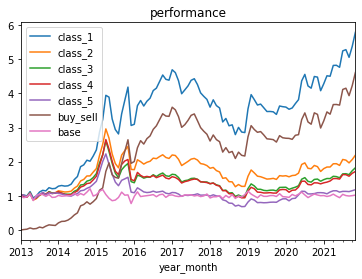

In [49]:
#分层组合回测表现

performance_plot=pd.DataFrame(index=year_month)
for i in range(5):
    class_name="class_%i"%(i+1)
    y=monthly_return_12_99pct[monthly_return_12_99pct["class_label"]==class_name]["cum_pct_change"].tolist()
    performance_plot[class_name]=list(map(lambda x:x+1,y))
performance_plot["buy_sell"]=performance_plot["class_1"]-performance_plot["class_5"]
performance_plot["base"]=model_monthly_return[model_monthly_return["class_label"]=="class_1"]["A_index_pct_change"].tolist()
performance_plot["base"]=performance_plot["base"].apply(lambda x:x+1)
performance_plot.plot(title="performance")

<AxesSubplot:title={'center':'performance over base'}, xlabel='year_month'>

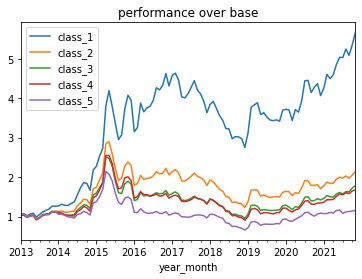

In [50]:
#各层除以基准组表现
performance_over_base_plot=performance_plot.apply(lambda x:x/performance_plot["base"])
performance_over_base_plot.iloc[:,:5].plot(title="performance over base")

In [51]:
#组合一超额收益分布图
y=model_monthly_return[model_monthly_return["class_label"]=="class_1"][["y"]]
y.describe()

,y
count,107.000000
mean,0.013913
std,0.050214
min,-0.220874
25%,-0.016330
50%,0.012598
75%,0.043609
max,0.182063


<AxesSubplot:title={'center':'extra return distribution'}>

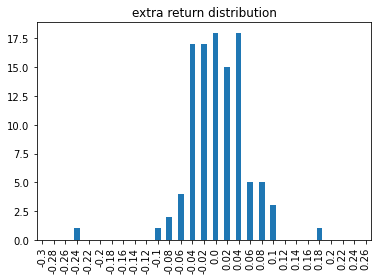

In [52]:
group_name=[round(i,2) for i in np.arange(-0.3,0.3,0.02)]
cuts=pd.cut(y.y.tolist(),group_name,labels=group_name[:-1])
counts=pd.value_counts(cuts)
#dict(counts)
cuts.value_counts().plot(kind="bar",title="extra return distribution")

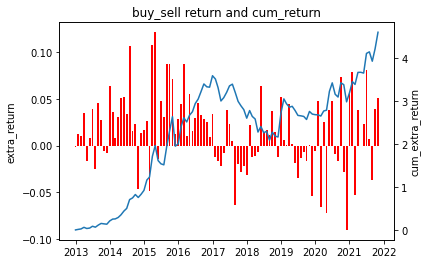

In [53]:
#多空组合月收益率及累计收益率
buy_sell=pd.DataFrame(index=year_month)
cum_buy=np.array(model_monthly_return[model_monthly_return["class_label"]=="class_1"]["cum_pct_change"].tolist())
cum_sell=np.array(model_monthly_return[model_monthly_return["class_label"]=="class_5"]["cum_pct_change"].tolist())
buy=np.array(model_monthly_return[model_monthly_return["class_label"]=="class_1"]["y"].tolist())
sell=np.array(model_monthly_return[model_monthly_return["class_label"]=="class_5"]["y"].tolist())

buy_sell["超额收益率"]=buy-sell
buy_sell["累计收益率"]=cum_buy-cum_sell


fig,ax=plt.subplots(1,1)
ax_sub=ax.twinx()
ax_sub.plot(year_month,buy_sell["累计收益率"].tolist())
ax.bar(year_month,buy_sell["超额收益率"].tolist(),width=20,color="red")
ax.set_title("buy_sell return and cum_return")
ax.set_ylabel("extra_return")
ax_sub.set_ylabel("cum_extra_return")

plt.show()

## 敏感性分析

In [54]:
s_a_annual_extra_return=pd.DataFrame(index=[6,12,18,24],columns=[80,90,95,99])
s_a_annual_return=pd.DataFrame(index=[6,12,18,24],columns=[80,90,95,99])
s_a_sharp_ratio=pd.DataFrame(index=[6,12,18,24],columns=[80,90,95,99])

In [55]:
for i in [6,12,18,24]:
    for j in [80,90,95,99]:
        print("term",i,"pca_pct",j)
        res=pd.DataFrame()
        res=get_predict(df,i,j/100,res)
        #df_name=vars()["res_%i"%i+"_%ipct"%j]
        vars()["res_%i"%i+"_%ipct"%j]=res
        
        monthly_return=get_monthly_return(res)
        vars()["monthly_return_%i"%i+"_%ipct"%j]=monthly_return
        
        performance=get_performance(monthly_return,res)
        vars()["performance_%i"%i+"_%ipct"%j] = performance
        s_a_annual_extra_return.loc[i,j]=performance["年化超额收益率"][0]
        s_a_annual_return.loc[i,j]=performance["年化收益率"][0]
        s_a_sharp_ratio.loc[i,j]=performance["夏普比率"][0]

term 6 pca_pct 80
-----EPOCH-----
预测时间： 201301
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2384, 5) (994, 5)
-----EPOCH-----
预测时间： 201302
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2386, 5) (994, 5)
-----EPOCH-----
预测时间： 201303
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2387, 5) (994, 5)
-----EPOCH-----
预测时间： 201304
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2388, 5) (994, 5)
-----EPOCH-----
预测时间： 201305
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2388, 5) (994, 5)
-----EPOCH-----
预测时间： 201306
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2388, 5) (994, 5)
-----EPOCH-----
预测时间： 201307
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2388, 5) (994, 5)
-----EPOCH-----
预测时间： 201308
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2388, 5) (994, 5)
-----EPOCH-----
预测时间： 201309
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0 0
处理后X： (2388, 5) (994, 5)
-----EPOCH-----
预测时间： 201310
数据大小： (7080, 75) (1180, 75)
缺失值： 0 33
缺失值： 0

KeyboardInterrupt: 

In [ ]:
#年化收益
s_a_annual_return=pd.DataFrame(s_a_annual_return,dtype=np.float)
ax=sns.heatmap(s_a_annual_return,annot=True,cmap=plt.get_cmap('Blues'))
ax.set_title("Heat Map for Annual Return")
plt.show()

In [ ]:
#年化超额收益
s_a_annual_extra_return=pd.DataFrame(s_a_annual_extra_return,dtype=np.float)
ax=sns.heatmap(s_a_annual_extra_return,annot=True,cmap=plt.get_cmap('Blues'))
ax.set_title("Heat Map for Annual Extra Return")
plt.show()

In [ ]:
#夏普比率
s_a_sharp_ratio=pd.DataFrame(s_a_sharp_ratio,dtype=np.float)
ax=sns.heatmap(s_a_sharp_ratio,annot=True,cmap=plt.get_cmap('Blues'))
ax.set_title("Heat Map for Sharp Ratio")
plt.show()